In [21]:
# Relative Libraries and Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, average_precision_score
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('all_stocks_5yr.csv')

# new_data = new_data.sort_values('date')
df = df.sort_values(by=['Name', 'date'])
df

,date,open,high,low,close,volume,Name
71611,2013-02-08,45.07,45.35,45.00,45.08,1824755,A
71612,2013-02-11,45.17,45.18,44.45,44.60,2915405,A
71613,2013-02-12,44.81,44.95,44.50,44.62,2373731,A
71614,2013-02-13,44.81,45.24,44.68,44.75,2052338,A
71615,2013-02-14,44.72,44.78,44.36,44.58,3826245,A
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [8]:
# Create a new column for the target and initialize it with 0
df['target'] = 0

# Define a function to compare close values and assign the target value
def compare_close_values(group):
    group['target'] = (group['close'].shift(-1) > group['close']).astype(int)
    return group

# Apply the function to each group within the DataFrame
df = df.groupby('Name', group_keys=False).apply(compare_close_values)

df.dropna(inplace=True)

# Reset the index of the DataFrame
df = df.reset_index(drop=True)

# Print the resulting dataset with the target column
print(df)

              date   open   high    low  close   volume Name  target
0       2013-02-08  45.07  45.35  45.00  45.08  1824755    A       0
1       2013-02-11  45.17  45.18  44.45  44.60  2915405    A       1
2       2013-02-12  44.81  44.95  44.50  44.62  2373731    A       1
3       2013-02-13  44.81  45.24  44.68  44.75  2052338    A       0
4       2013-02-14  44.72  44.78  44.36  44.58  3826245    A       0
...            ...    ...    ...    ...    ...      ...  ...     ...
619024  2018-02-01  76.84  78.27  76.69  77.82  2982259  ZTS       0
619025  2018-02-02  77.53  78.12  76.73  76.78  2595187  ZTS       0
619026  2018-02-05  76.64  76.92  73.18  73.83  2962031  ZTS       0
619027  2018-02-06  72.74  74.56  72.13  73.27  4924323  ZTS       1
619028  2018-02-07  72.70  75.00  72.69  73.86  4534912  ZTS       0

[619029 rows x 8 columns]


In [9]:
features = df[['open', 'high', 'low', 'close', 'volume']]
target = df['target']

In [10]:
# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [11]:
# Choosing a model -> RandomForest in this case
model = RandomForestClassifier()

In [12]:
# Training the model
model.fit(X_train, y_train)
# model = joblib.load('random_forest_model_2.pkl')

RandomForestClassifier()

In [13]:
# Make predictions
predictions = model.predict(X_test)

In [ ]:
# Saving the trained model
# joblib.dump(model, 'random_forest_model_2.pkl')

In [14]:
# Report Accuracy and stuff
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.5037720304347124
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.45      0.47     59278
           1       0.52      0.55      0.54     64528

    accuracy                           0.50    123806
   macro avg       0.50      0.50      0.50    123806
weighted avg       0.50      0.50      0.50    123806



In [19]:
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print("MSE: ", mse)
print("R2: ", r2)
print("RMSE:", rmse)
print("MAE:", mae)

MSE:  0.49622796956528764
R2:  -0.9884875537636395
RMSE: 0.7044345033892702
MAE: 0.49622796956528764


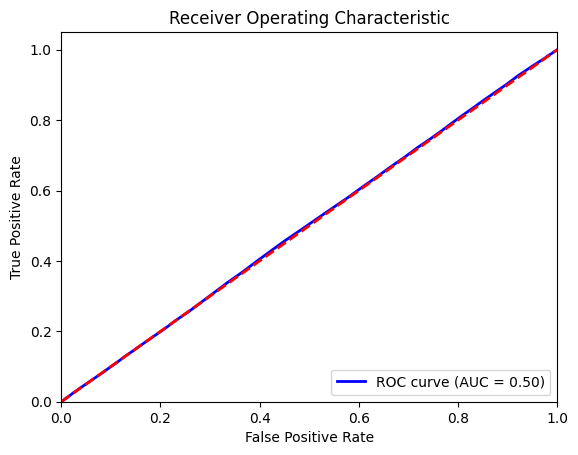

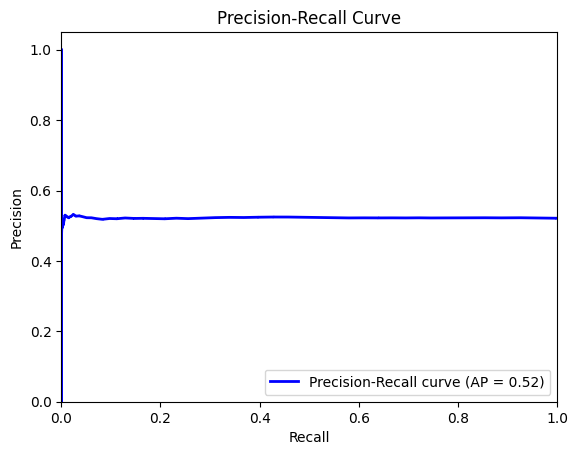

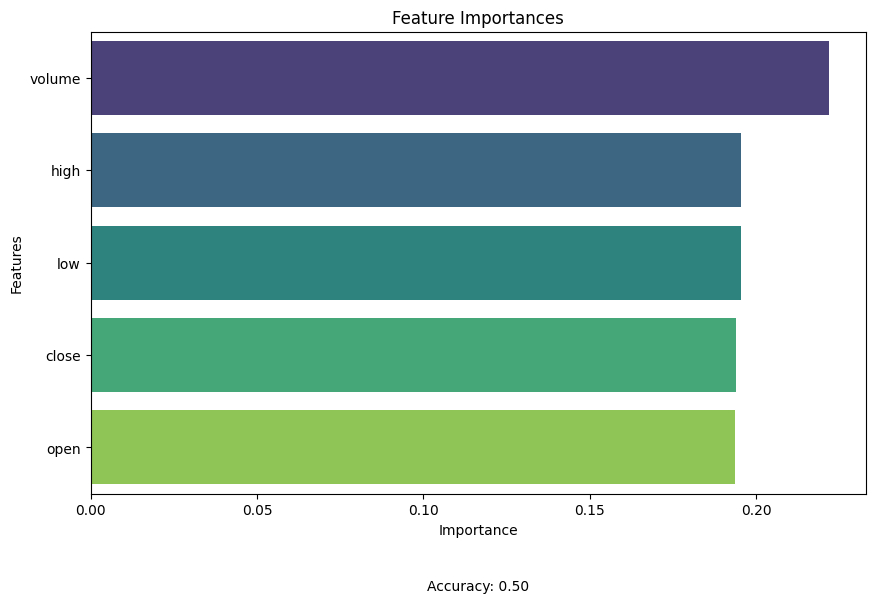

In [23]:

# Obtain predicted probabilities for positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
numeric_features = ['open', 'high', 'low', 'close', 'volume']
feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [numeric_features[i] for i in sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_indices], y=sorted_features, palette='viridis')

# Calculate and display the accuracy
accuracy = model.score(X_test, y_test)
accuracy_text = f'Accuracy: {accuracy:.2f}'
plt.text(0.5, -0.2, accuracy_text, ha='center', va='center', transform=plt.gca().transAxes)

plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()
